# Session3


### Perprocessing

- Create a notebook and log all the command and output. Provide all answers inside the notebook
- Read data in gml-format in iGraph
- Check if the network is undirected/directed and weighted/unweighted
- Calculate degree and plot degree distribution
- Check if the network is connected
- Identify the largest connected component
- Retain only this largest component
- Calculate degree and plot degree distribution again.
- Save new network in gml and pajek format
- Save the label list (author names)

In [2]:
# Import of required libraries and packages
import igraph as ig
from matplotlib import pyplot as plt
import numpy as np



def get_attributes(g):
    print("Attribute of node: %s. Attribute of edge: %s"%(g.vs.attribute_names(), g.es.attribute_names()))
    print("Number of nodes: %d. Number of edges: %d" %(g.vcount(), g.ecount()))
    print("Fully connected: Lmax = %d. "%(g.vcount()*(g.vcount()-1)/2))
    print("Desity: %f" %(g.ecount()/(g.vcount()*(g.vcount()-1)/2)))

def plot_dist(g):
    print(max(g.degree()))
    hist,bins=np.histogram(g.degree(),bins=np.linspace(0,20,20))
    print(hist)
    print(bins) 
    fig, ax = plt.subplots(figsize=(16, 7))
    ax.plot(bins[1:],hist)
    ax.set_xlabel('Degree')  # Add an x-label to the axes.
    ax.set_ylabel('Counts')  # Add a y-label to the axes.
    ax.set_title("Distribution of degree")  # Add a title to the axes.

def degree_betweenness(g):
    print("Betweeness: minimum: % .2f, maximum: % .4f" %(min(betweenness),max(betweenness)))
    print("Number of degrees calculated : % 2d, minimum : % 2d, maximim : % 2d" %(len(degree), min(degree), max(degree)))
    print("Average path length: % .2f" %g.average_path_length())
    ## closeness of nodes
    cls = g.closeness()
    # Local clustering coefficient: transitivity coefficient, measure the porbablity that two points are connected(degree existing or not)
    trans = g.transitivity_local_undirected()
    #print(trans)
    fig = plt.figure(figsize=(16, 7))
    plt.scatter(degree, betweenness, marker='^', c = "g")
    plt.xlabel("Degree")
    plt.ylabel("Betweenness")
    plt.show()
    
def plot_graph(elecnet, max_d = -1, max_e = -1):
    
    vcolor = ["gold"]*elecnet.vcount()
    vsize = [8]*elecnet.vcount()
    vlsize = [3]*elecnet.vcount()

    if(max_d != -1):
        vcolor[max_d] = "green"
        vsize[max_d] = 25
        vlsize[max_d] = 10
    if(max_e != -1):    
        vcolor[max_e] = "blue"
        vsize[max_e] = 25
        vlsize[max_e] = 10


    #Define style from network plotting
    visual_style = {}
    visual_style["vertex_size"] = vsize
    visual_style["vertex_label_size"]= vlsize
    visual_style["vertex_color"] = vcolor
    visual_style["vertex_label"] = elecnet.vs["id"]
    visual_style["edge_width"] = 1
    visual_style["layout"] = layout
    visual_style["bbox"] = (600, 600)
    visual_style["margin"] = 30

    return ig.plot(elecnet, "graph.svg", **visual_style)

def drop(graph, num_drop, typ):
    drop = []
    num_cluster = []
    for i in range(num_drop):
        if(typ == "d"):
            max_item = max(graph.degree())
            drop.append(str([graph.vs[idx] for idx, item in enumerate(graph.degree()) if(item == max_item)]).split(',')[1])
        elif(typ == "b"):
            max_item = max(graph.betweenness())
            drop.append(str([graph.vs[idx] for idx, item in enumerate(graph.betweenness()) if(item == max_item)]).split(',')[1])
        graph.delete_vertices(int(drop[i]))
        num_cluster.append(len(graph.clusters()))
    return num_cluster
    


In [2]:
#filename = easygui.fileopenbox()
filename = "cond-mat-2005/cond-mat-2005.gml"
print(filename)

cond_mat = ig.Graph.Read_GML(filename)

ig.summary(cond_mat)

cond-mat-2005/cond-mat-2005.gml
IGRAPH U--- 40421 175692 -- 
+ attr: id (v), label (v), value (e)


In [6]:
#check if the graph is weighted graph
cond_mat.is_weighted()

False

**Calculate number of nodes, number of edges, density**

In [7]:
# Get the attributes and the number of nodes
get_attributes(cond_mat)

Attribute of node: ['id', 'label']. Attribute of edge: ['value']
Number of nodes: 40421. Number of edges: 175692
Fully connected: Lmax = 816908410. 
Desity: 0.000215


In [18]:
degree = cond_mat.degree()

In [15]:
betweenness = cond_mat.betweenness(weights = None)

**Calculate degree and plot degree distribution**

**Describe degree distribution properties**

- Degree distribution of Power plants network are mostly low (within 10), only a few of them have higher degree

278
[4633 5242 4956 4061 3226 2722 2223 1724 1383 1228  931  819  677  626
  489  454  390  389  612]
[ 0.          1.05263158  2.10526316  3.15789474  4.21052632  5.26315789
  6.31578947  7.36842105  8.42105263  9.47368421 10.52631579 11.57894737
 12.63157895 13.68421053 14.73684211 15.78947368 16.84210526 17.89473684
 18.94736842 20.        ]


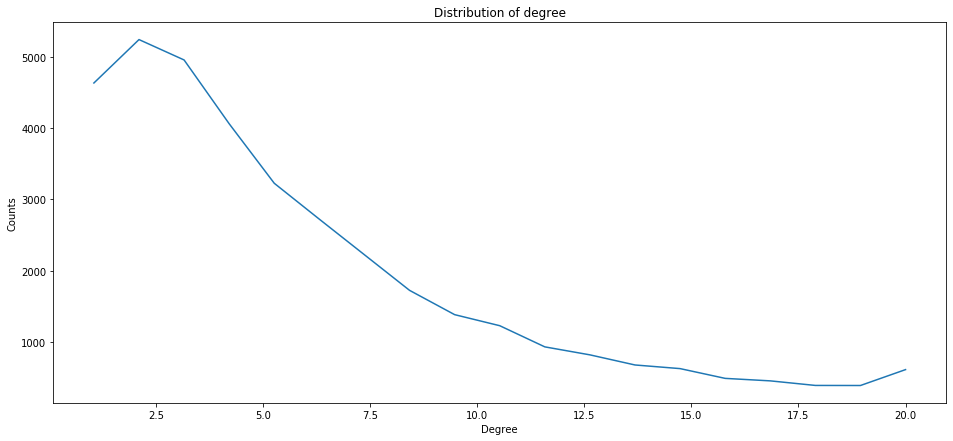

In [8]:
plot_dist(cond_mat)

**Check the network connectivity**

In [25]:
cond_mat.is_connected(mode = 'weak')

False

**Identify the largest connected component**
**Retain only this largest component**


In [41]:
largest = cond_mat.components().giant()


**Calculate the degrees and plot the distribution again**

278
[2643 4411 4474 3758 3096 2610 2177 1707 1362 1223  929  817  675  626
  488  454  390  370  612]
[ 0.          1.05263158  2.10526316  3.15789474  4.21052632  5.26315789
  6.31578947  7.36842105  8.42105263  9.47368421 10.52631579 11.57894737
 12.63157895 13.68421053 14.73684211 15.78947368 16.84210526 17.89473684
 18.94736842 20.        ]


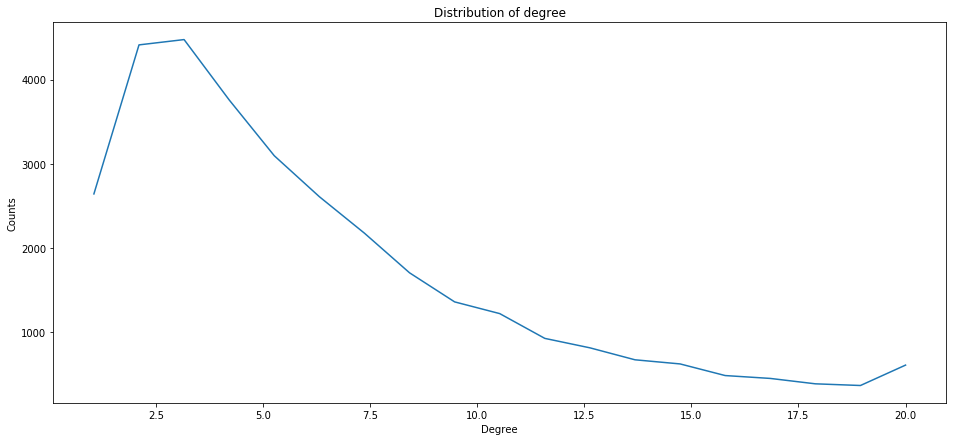

In [46]:
plot_dist(largest)

**Save new network in glm and pajeck format**

In [48]:
largest.write_pajek('cond-mat-2005/largest.net')
largest.write_gml('cond-mat-2005/largest.gml')

**Save the label list**

In [64]:
with open('cond-mat-2005//label_list.txt', 'w') as f: 
    for line in largest.vs['label']:
        f.write(line+'\n') 


### Clustering & Visualization:

- Run the Fast-Greedy community detection algorithm from the igraph packages on the reduced network
- Calculate modularity scores for each cluster solution
- Visualize the  network with nodes in different colour according to their cluster membership

In [3]:
#filename = easygui.fileopenbox()
filename = "cond-mat-2005/largest.gml"
print(filename)

cond_mat = ig.Graph.Read_GML(filename)

ig.summary(cond_mat)

cond-mat-2005/largest.gml
IGRAPH U--- 36458 171735 -- 
+ attr: id (v), label (v), value (e)


**Run the Fast-Greedy community detection algorithm from the igraph packages on the reduced network**

In [4]:
fastgreedy = cond_mat.community_fastgreedy()

**Calculate modularity scores for each cluster solution**

In [13]:
for i in range(1,100):
    cluster = fastgreedy.as_clustering(i)
    print(i, cond_mat.modularity(cluster))


1 0.0
2 0.38049201533145754
3 0.5100801168393344
4 0.5663670273658117
5 0.5877178670318893
6 0.5949673450036754
7 0.5990139680425518
8 0.6011755792743236
9 0.6024401226752792
10 0.6036069993835272
11 0.604400515615783
12 0.6049713857968386
13 0.6055269643706381
14 0.6060058680255248
15 0.6063851165606701
16 0.606749027070624
17 0.6070971060469501
18 0.6073838597086093
19 0.6076632021145348
20 0.6079329788147418
21 0.6081747479363919
22 0.6084096682934248
23 0.6086230778366669
24 0.6088276354050445
25 0.6090177867314891
26 0.6092078155369629
27 0.6093921343430262
28 0.6095351348461243
29 0.6096709193268502
30 0.6098056988711432
31 0.6099325901298035
32 0.6100577426824623
33 0.610181433154924
34 0.6102989283757604
35 0.6104130427840818
36 0.6105240211505784
37 0.6106324505315925
38 0.6107390882277712
39 0.6108441622939234
40 0.6109485245618893
41 0.611052076702953
42 0.6111528147609249
43 0.6112470152646664
44 0.6113404914926467
45 0.6114307447935146
46 0.611520035947894
47 0.61160414361

In [14]:
cluster_best = fastgreedy.as_clustering()

**Visualize the  network with nodes in different colour according to their cluster membership**

In [ ]:
# try cluster_best
color_list = ig.drawing.colors.ClusterColoringPalette(500) 
ig.plot(cond_mat, "fastgreedy.svg", layout=cond_mat.layout("drl"), 
     vertex_color=[color_list[x] for x in cluster_best.membership],
       vertex_size = 15,
       vertex_label_size = 5)

### Compare cluster solution:

- Run two other algorithms: Leading Eigenvector (= Newman), MultiLevel (= Louvain Method)
- Compare the number of obtained clusters and modularity scores.
- Try different visualization layouts, which combination cluster algorithm-layout provides the most appealing results?Is this the best clustering?
- Use the 'compare_communities()' function from iGraph. Discuss the different possible measure and try to interprete the result of the pairwise comparison.

In [5]:
le = cond_mat.community_leading_eigenvector()
le.summary()

'Clustering with 36458 elements and 3 clusters'

In [59]:
print(cond_mat.modularity(le))

0.3275404242851386


In [6]:
mul = cond_mat.community_multilevel()
mul.summary()

'Clustering with 36458 elements and 89 clusters'

In [60]:
print(cond_mat.modularity(mul))

0.7157336578845533


**Use the 'compare_communities()' function from iGraph. Discuss the different possible measure and try to interprete the result of the pairwise comparison.**

In [8]:
#variation of information metric
ig.compare_communities(le, mul, method ='vi')

3.73704108235182

In [10]:
# normalized mutual information
ig.compare_communities(le, mul, method ='nmi')

0.09219514349571033

In [11]:
# normalized mutual information
ig.compare_communities(le, mul, method ='split-join')

36307.0

In [12]:
# normalized mutual information
ig.compare_communities(le, mul, method ='adjusted_rand')

0.0022993369838795806